In [1]:
import random
import re
import os
from HMM import unsupervised_HMM
from punctuation_dict import get_punctuation_dict
from syllable_dict import get_syllable_dict
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)
syl_dict = get_syllable_dict()

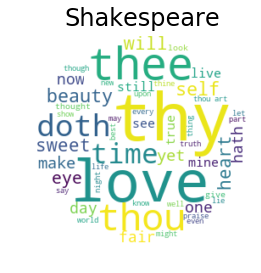

In [2]:
text = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()
wordcloud = text_to_wordcloud(text, title='Shakespeare')

In [3]:
def parse_observations(text):
    # Convert text to dataset.
    lines = [line.split() for line in text.split('\n') if line.split()]

    # Store a list of words to keep capitalized
    cap_words = ["i'll", 'i', 'o']
    punc_dict = get_punctuation_dict()
    obs_counter = 0
    obs = []
    obs_map = {}

    # Iterate through all the lines of poems
    for line in lines:

        # Skip line with poem id (not an actual line of poem)
        if len(line) == 1:
            continue

        obs_elem = []
        
        for word in line:
            # Convert to lowercase and remove punctuations not part of a word
            word = punc_dict[re.sub(r'[^\w]', '', word.lower())]
            
            # Keep certain words capitalized
            if word in cap_words:
                word = word.capitalize()
                
            if word not in obs_map:
                # Add unique words to the observations map.
                obs_map[word] = obs_counter
                obs_counter += 1
            
            # Add the encoded word.
            obs_elem.append(obs_map[word])
        
        # Add the encoded sequence.
        obs.append(obs_elem)

    return obs, obs_map

In [19]:
obs, obs_map = parse_observations(text)
print(obs_map)

{'from': 0, 'fairest': 1, 'creatures': 2, 'we': 3, 'desire': 4, 'increase': 5, 'that': 6, 'thereby': 7, "beauty's": 8, 'rose': 9, 'might': 10, 'never': 11, 'die': 12, 'but': 13, 'as': 14, 'the': 15, 'riper': 16, 'should': 17, 'by': 18, 'time': 19, 'decease': 20, 'his': 21, 'tender': 22, 'heir': 23, 'bear': 24, 'memory': 25, 'thou': 26, 'contracted': 27, 'to': 28, 'thine': 29, 'own': 30, 'bright': 31, 'eyes': 32, "feed'st": 33, 'thy': 34, "light's": 35, 'flame': 36, 'with': 37, 'self-substantial': 38, 'fuel': 39, 'making': 40, 'a': 41, 'famine': 42, 'where': 43, 'abundance': 44, 'lies': 45, 'self': 46, 'foe': 47, 'sweet': 48, 'too': 49, 'cruel': 50, 'art': 51, 'now': 52, "world's": 53, 'fresh': 54, 'ornament': 55, 'and': 56, 'only': 57, 'herald': 58, 'gaudy': 59, 'spring': 60, 'within': 61, 'bud': 62, 'buriest': 63, 'content': 64, 'churl': 65, "mak'st": 66, 'waste': 67, 'in': 68, 'niggarding': 69, 'pity': 70, 'world': 71, 'or': 72, 'else': 73, 'this': 74, 'glutton': 75, 'be': 76, 'eat':

In [5]:
hmm1 = unsupervised_HMM(obs, 1, 100)
hmm2 = unsupervised_HMM(obs, 2, 100)
hmm4 = unsupervised_HMM(obs, 4, 100)
hmm8 = unsupervised_HMM(obs, 8, 100)
hmm15 = unsupervised_HMM(obs, 15, 100)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


In [25]:
def obs_map_reverser(obs_map):
    obs_map_r = {}

    for key in obs_map:
        obs_map_r[obs_map[key]] = key

    return obs_map_r

def sample_sentence(hmm, obs_map, n_syl=10):
    # Get reverse map.
    obs_map_r = obs_map_reverser(obs_map)

    # Sample and convert sentence.
    emission, states = hmm.generate_emission(n_syl, obs_map_r,syl_dict)
    sentence = [obs_map_r[i] for i in emission]
    sentence[0] = sentence[0].capitalize()
    return ' '.join(sentence)

In [26]:
hmm_models = [hmm1, hmm2, hmm4, hmm8, hmm15]

In [27]:
def generate_sonnet(hmm):
    for i in range(14):
        print(sample_sentence(hmm, obs_map))

In [28]:
def generate_haiku(hmm):
    print(sample_sentence(hmm, obs_map, 5))
    print(sample_sentence(hmm, obs_map, 7))
    print(sample_sentence(hmm, obs_map, 5))

In [29]:
num = [1,2,4,8,15]
for i in range(len(hmm_models)):
    print("HMM with " + str(num[i]) + " hidden states.")
    print("")
    generate_sonnet(hmm_models[i])
    print('\n***************************************\n')

HMM with 1 hidden states.

I and too I I take he errors pen
Budding doth flowers makes deeds where sharp'st this so
Of lead another day the instant fair
My thee friend those mine which to I so turns
A is give returned good commend learned but
Did make I loves well-contented it all
Thee her is thou the his be inward the
Time outward not clearer me reigns decay
And in a wear husband's these being where in
You turns I hath and have being now steal faith
So told are a resty but breathes me thou
Like their with uphold in images those
Therefore stand again if looks say thou must
Still to with hold lines thy though my rhyme is

***************************************

HMM with 2 hidden states.

Thou grown most thee less life to that being their
First mind lie none with happier and him not
Give my for that of to to but looks to
Bestow so O my thy on grace thine you
You do if me to thoughts word at and as
That with sense of in cure the thou should these
With with to thou loves from how thou aga

In [34]:
hmm20 = unsupervised_HMM(obs, 20, 100)
print("HMM with " + str(20) + " hidden states.")
print("")
generate_sonnet(hmm20)
print('\n***************************************\n')

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
HMM with 20 hidden states.

Whence less the song seen leave or no thine own
That alone on whose their will not and with
Rocks every grave I hold so long-lived luck
Suspect thy most issue fight this gentle
But with being she abuse to me fire
Father to left so farther for I sits
But your name rich indigest great women's
A in region good and as to be no
Thorns who ignorance fair much of thee proud
Prove thee thou birth might in thine were my self
This this praised so thy lameness in the and
The rest of doth early since all beauty's
Thou art fears from your verse ornament the
Have this thou of greet the becoming of

***************************************



In [35]:
hmm25 = unsupervised_HMM(obs, 25, 100)
print("HMM with " + str(25) + " hidden states.")
print("")
generate_sonnet(hmm25)
print('\n***************************************\n')

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
HMM with 25 hidden states.

Then but wherein thou should I were abused
Art gone in make be doth so oblivion
Tongue can say folly had doth to sight with
Self thee the distraction and faith that none
On for thy self thou have I audit but
Abysm in cross self-love prove upon ah
Of me ruth assured the why of grace
Woe the motion of my own rain tongue-tied
Sparkling note both may in in brand of deaths
That am heir words of cloud shall they is she
Before olives in their birth and to my
Desert played afterwards deeds vex me muse
Where should so idol souls reason thee spur
On love hidden that which in your canst shine

***************************************



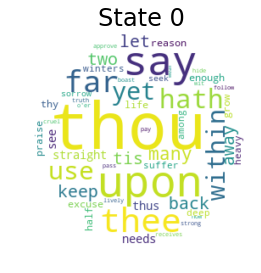

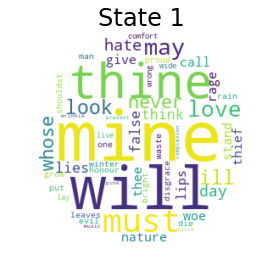

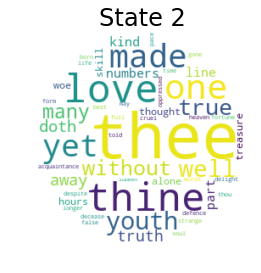

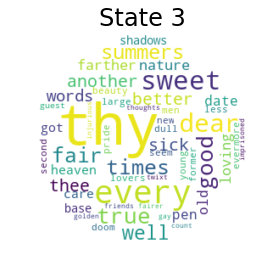

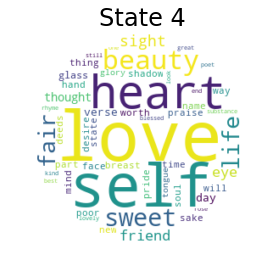

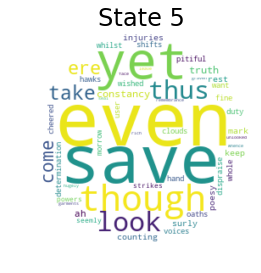

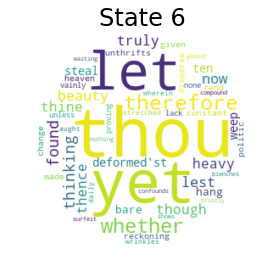

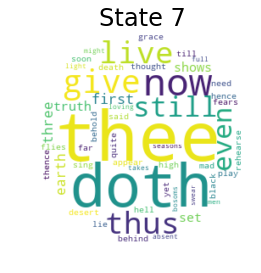

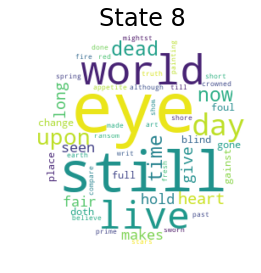

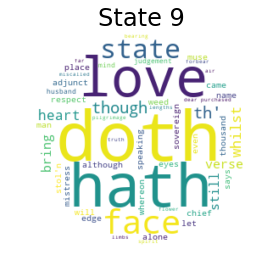

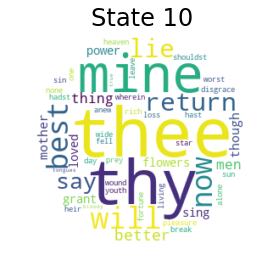

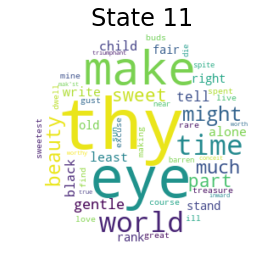

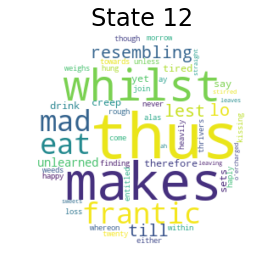

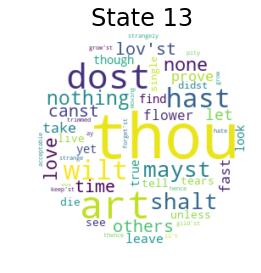

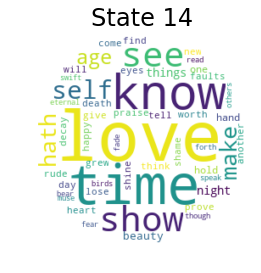

In [37]:
wordclouds = states_to_wordclouds(hmm15, obs_map)

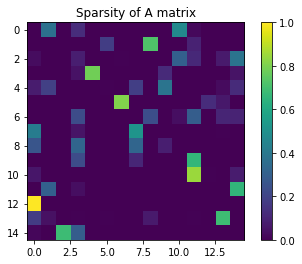

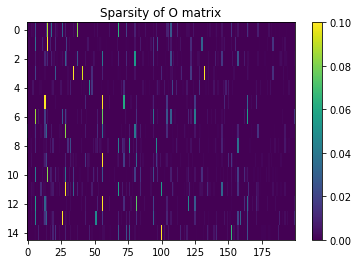

In [38]:
visualize_sparsities(hmm15, O_max_cols=200)